## `MeshArrays.jl` test suite uses the `MeshArrays.smooth` function


Load the `MeshArrays.jl` and `'Plots.jl` package modules

In [1]:
using MeshArrays, Plots

In [2]:
!isdefined(MeshArrays,:GridSpec) ? GridSpec=GCMGridSpec : nothing
!isdefined(MeshArrays,:GridLoad) ? GridLoad=GCMGridLoad : nothing
!isdefined(MeshArrays,:GridOfOnes) ? GridOfOnes=GCMGridOnes : nothing

Define a grid with `6` faces of `16*16` points and distances, areas, etc. all set to `1.0`:

In [3]:
GridVariables=GridOfOnes("cs",6,16);

Smooth a randomly initialized `Rini` at 3 grid point scales (`DXCsm,DYCsm`):

In [4]:
(Rini,Rend,DXCsm,DYCsm)=MeshArrays.demo2(GridVariables);

Define `qwckplot` and use it to vizualize the resulting `Rend`:

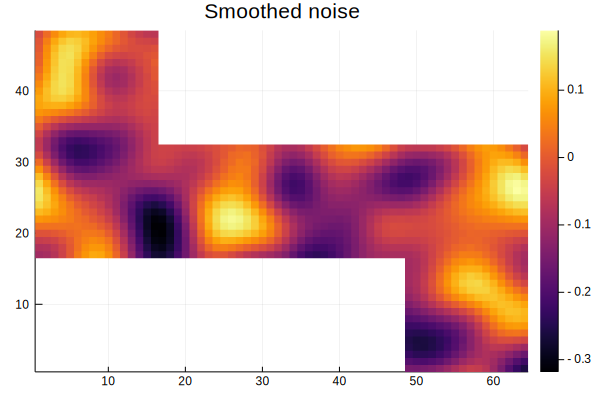

In [5]:
function qwckplot(fld::MeshArray,ttl::String)
    arr=MeshArrays.convert2array(fld)
    arr=permutedims(arr,[2 1])
    #This uses Plots.jl:
    p=heatmap(arr,title=ttl)
end

qwckplot(Rend,"Smoothed noise")

Note the increased smoothness and reduced magnitude as compared with `Rini`:

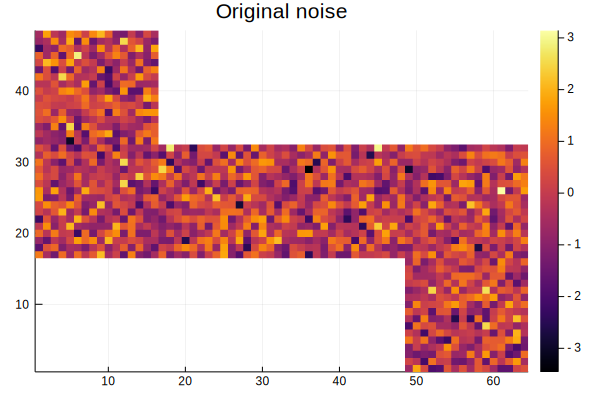

In [6]:
qwckplot(Rini,"Original noise")

To finish, let's benchmark `smooth` as a function of smoothing scale parameters:

In [7]:
@time Rend=smooth(Rini,DXCsm,DYCsm,GridVariables);
@time Rend=smooth(Rini,2DXCsm,2DYCsm,GridVariables);

  0.002885 seconds (8.21 k allocations: 6.797 MiB)
  0.021491 seconds (30.69 k allocations: 24.272 MiB, 42.42% gc time)
